# Saurabh Pradhan
## 277643

## Neural network setup

## The general setup of neural network is as follows :-
The input to the neural network is a vector of dimension (m , 1) where m it the total no of features, bias excluded.<br /> The dimensions of bias is (m, 1)
From m dimensional layer to other n dimensional layer a weight matrix is attached. The dimension of this weight matrix is (m, n) <br/>

In [1107]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Loss Functions

In [1108]:
def squaredError(y, yPrediction, derivative = False):
    if derivative == False:
        return np.sum(((y - yPrediction) ** 2))
    else:
        return -1 * (y - yPrediction)

## Activation Functions

In [1109]:
import numpy as np

def relu(x, derivative = False):
    if derivative == False:
        return np.maximum(x, 0)
    else:
        """Deep copy"""
        x = x.copy()
        x[x<0] = 0
        x[x>0] = 1
        return x

def linearActivation(x, derivative = False):
    if derivative == False:
        return x
    else:
        return 1

In [1110]:
def L1Regularization(gradients):
    """Deep copy"""
    gradients = gradients.copy()
    gradients[gradients > 0] = 1
    gradients[gradients <= 0] = -1
    
    return gradients

In [1111]:
def L2Regularization(gradients):
    return gradients

## Neural network

In [1112]:
from enum import Enum

class STRUCTURE(Enum):
    WEIGHTMATRIX = "weightMatrix"
    ACTIVATIONFUNCTION = "activationFunction"
    BIAS = "bias"
    INITIALLAYER = "initialLayer"
    REGULARIZATION = "regularization"
    REGULARIZATIONPENALTY = "regularizationPenalty"
    

class NeuralNetwork:
    
    networkStructure = None
    lossFunction = None
            
    def __init__(self, networkStructure, lossFunction):
        self.networkStructure = networkStructure
        self.lossFunction = lossFunction
    
    def forwardPropogationStep(self, x, retainIntermediateValues = False):
        output = x
        intermediateValues = []
        for layer in self.networkStructure:
                aggregation = np.dot(output, layer[STRUCTURE.WEIGHTMATRIX]) + layer[STRUCTURE.BIAS]
                if retainIntermediateValues == True:
                    intermediateValues.append([output, aggregation])

                output = layer[STRUCTURE.ACTIVATIONFUNCTION](aggregation)
        return output, intermediateValues

    def backPropogationStep(self, x, y, learningRate):
        prediction, intermediateValues = self.forwardPropogationStep(x, True)
        loss = self.lossFunction(y, prediction)
        #print("Calculated loss at end of forward propogation " +str(loss))
        backPropogationComponent = self.lossFunction(y, prediction, derivative = True)
        for layer, intermediateValue in zip(reversed(self.networkStructure), reversed(intermediateValues)):
            
            backPropogationComponent = backPropogationComponent * layer[STRUCTURE.ACTIVATIONFUNCTION](intermediateValue[1], 
                                                                                            derivative = True)
            """Update weights in current layer"""
            weightGradient = intermediateValue[0].T * backPropogationComponent
            biasGradient = 1 * backPropogationComponent
            
            regularization = 0
            if STRUCTURE.REGULARIZATION in layer:
                regularization = layer[STRUCTURE.REGULARIZATION](weightGradient)
                regularization = regularization * layer[STRUCTURE.REGULARIZATIONPENALTY]
            
            """Dirty update"""
            layer[STRUCTURE.WEIGHTMATRIX] = layer[STRUCTURE.WEIGHTMATRIX] - learningRate * (weightGradient +
                                                                                            regularization)
            layer[STRUCTURE.BIAS] = layer[STRUCTURE.BIAS] - learningRate * biasGradient
                       
            
            if layer[STRUCTURE.INITIALLAYER] == True:
                break
            
            """Update in the previous layer depends on the output of activation function"""
            backPropogationComponent = backPropogationComponent * layer[STRUCTURE.WEIGHTMATRIX].T

## XOR

In [1113]:
structure = [
    {
        STRUCTURE.WEIGHTMATRIX:np.random.normal(size = (2, 2)),
        STRUCTURE.BIAS: np.ones(2).reshape(1, 2),
        STRUCTURE.ACTIVATIONFUNCTION : linearActivation,
        STRUCTURE.INITIALLAYER:True,
        STRUCTURE.REGULARIZATION:L2Regularization,
        STRUCTURE.REGULARIZATIONPENALTY:0.1
    }
    ,
    {
        STRUCTURE.WEIGHTMATRIX:np.random.normal(size = (2, 1)),
        STRUCTURE.BIAS: np.ones(1).reshape(1, 1),
        STRUCTURE.ACTIVATIONFUNCTION : relu,
        STRUCTURE.INITIALLAYER:False,
        STRUCTURE.REGULARIZATION:L2Regularization,
        STRUCTURE.REGULARIZATIONPENALTY:0.05
    }
]

nn = NeuralNetwork(structure, squaredError)

In [1114]:
inputData = np.array([1, 1, -1, 1, 1, -1, -1, -1]).reshape(-1, 2)
output = np.array([1, 0, 0, 1])

In [1115]:
prediction = []
for x,y in zip(inputData, output):
    yPred = nn.forwardPropogationStep(x)
    prediction.append(yPred[0][0])

In [1116]:
squaredError(output, prediction)
loss = []

In [1117]:
from random import shuffle
indices = [0, 1, 2, 3]
for i in range(0, 100):
    
    shuffle(indices)
    for i in indices:
        nn.backPropogationStep(inputData[i], output[i], 0.02)
        prediction = []
    for x,y in zip(inputData, output):
        yPred = nn.forwardPropogationStep(x)
        prediction.append(yPred[0][0])
    squaredloss = squaredError(prediction, output)
    loss.append(squaredloss)
    if len(loss) > 2 and squaredloss > loss[-2]:
        print("Converged")
        break

Converged


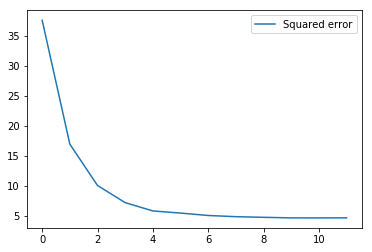

In [1118]:
import matplotlib.pyplot as plt
plt.plot(loss, label = "Squared error")
plt.legend()
plt.show()